In [1]:
# import data science libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the data
users_data = pd.read_pickle("../data/users_data_cleaned.pkl")


In [3]:
users_data.head()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,False,True,False,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,False,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
users_data.shape

(45209, 25)

In [5]:
# check the structure - you should only have numerical data types

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   default              45209 non-null  bool   
 4   housing              45209 non-null  bool   
 5   loan                 45209 non-null  bool   
 6   duration             45209 non-null  int64  
 7   campaign             45209 non-null  int64  
 8   pdays                45209 non-null  int64  
 9   previous             45209 non-null  int64  
 10  term_deposit         45209 non-null  bool   
 11  marital_divorced     45209 non-null  uint8  
 12  marital_married      45209 non-null  uint8  
 13  marital_single       45209 non-null  uint8  
 14  education_Unknown    45209 non-null  uint8  
 15  education_primary    45209 non-null 

In [6]:
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# import the definition from the helpers file in the src folder
from src.helpers import identify_missing_data


In [7]:
identify_missing_data(users_data)

# no missing data, yay - we can continue

,feature,percent_missing,data_type


In [8]:
# we need to define our features and target

target = users_data.total_amount_usd
features = users_data.drop(['total_amount_usd'], axis = 1)

In [10]:
# since our target is a continuous variables we use a regression algorithm

users_data.total_amount_usd

0        2143.0
1           0.0
2           2.0
3           0.0
4           1.0
          ...  
45211     825.0
45212    1729.0
45213    5715.0
45214       0.0
45215    2971.0
Name: total_amount_usd, Length: 45209, dtype: float64

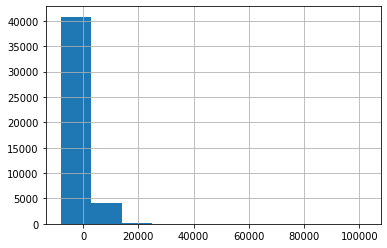

In [11]:
# visualise the target

target.hist();


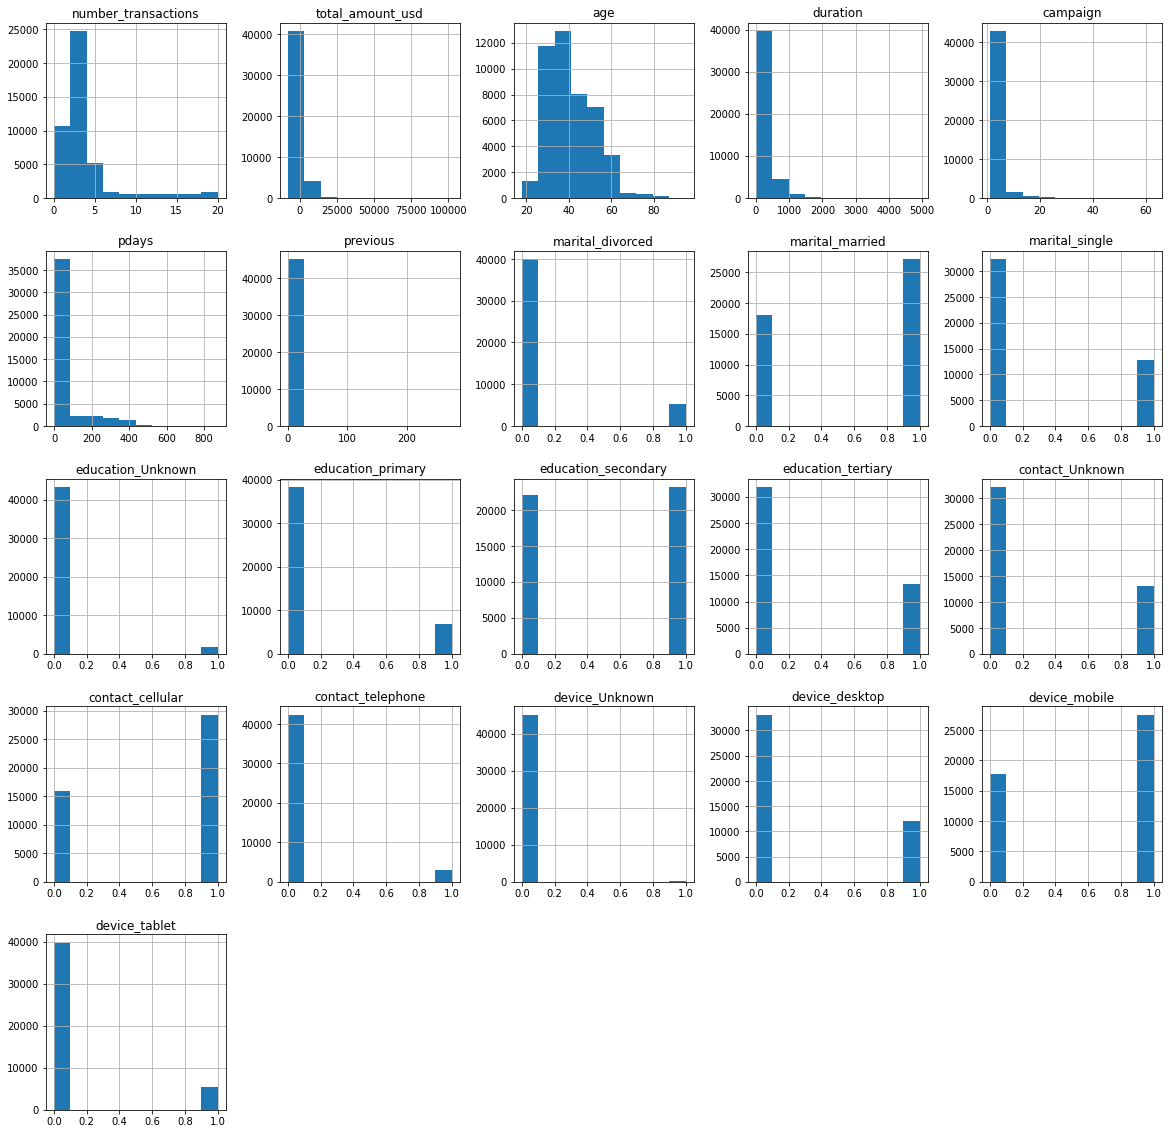

In [14]:
# scale the data
# but look at the distribution of the underlying data

users_data.hist(figsize = (20, 20));

# since our data is not normally distributed, we are going to use normalisation for scaling

In [24]:
# code to scale the data using the normalisation technique

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(features)
features_scaled = min_max_scaler.transform(features)


array([[0.15      , 0.51948052, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33766234, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1       , 0.19480519, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.1       , 0.7012987 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.50649351, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15      , 0.24675325, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [16]:
features

,number_transactions,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,58,False,True,False,261,1,-1,0,False,...,0,0,1,1,0,0,0,0,1,0
1,0.0,44,False,True,False,151,1,-1,0,False,...,0,1,0,1,0,0,0,1,0,0
2,2.0,33,False,True,True,76,1,-1,0,False,...,0,1,0,1,0,0,0,0,1,0
3,0.0,47,False,True,False,92,1,-1,0,False,...,0,0,0,1,0,0,0,0,0,1
4,1.0,33,False,False,False,198,1,-1,0,False,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,51,False,False,False,977,3,-1,0,True,...,0,0,1,0,1,0,0,1,0,0
45212,4.0,71,False,False,False,456,2,-1,0,True,...,1,0,0,0,1,0,0,1,0,0
45213,2.0,72,False,False,False,1127,5,184,3,True,...,0,1,0,0,1,0,0,0,1,0
45214,0.0,57,False,False,False,508,4,-1,0,False,...,0,1,0,0,0,1,0,1,0,0


In [25]:
# split our data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [26]:
# print the shape of the training data

print("Training Data")
print(X_train.shape)
print(y_train.shape)

Training Data
(31646, 24)
(31646,)


In [27]:
# print the shape of the test data

print("Test Data")
print(X_test.shape)
print(y_test.shape)

Test Data
(13563, 24)
(13563,)


In [29]:
# Import the Linear Regression model from sklearn

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [30]:
# training the model

lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# make predictions on unseen data

y_pred = lr.predict(X_test)
y_pred

array([1502.07047087, 1353.18638504, 1409.99673052, ...,  574.34635575,
        746.23583475,  661.1775697 ])

In [32]:
print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [1502.07047087 1353.18638504 1409.99673052  983.38516179 1163.93151566]
first five actual total amounts: [536.0, 31.0, 19.0, 115.0, 0.0]


In [33]:
# evaluate how the model is performing

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

# Pretty close to 0, which means the features do not explain the target

0.027244218613810767

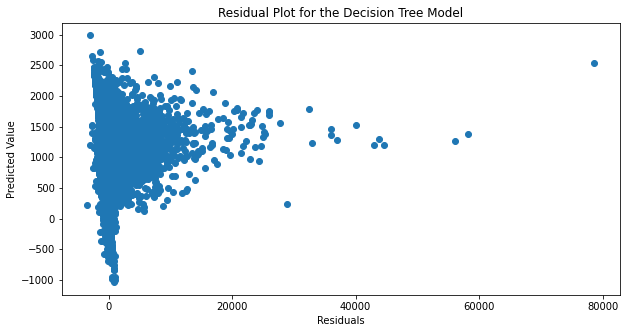

In [34]:
# residual plot - shows where all the error lies

plt.rcParams["figure.figsize"] = (10,5)

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot for the Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

# we want them the points to be centred around 0